# Polarización
En este notebook aprendemos a trabajar en forma simbólica con matrices usando SymPy, y luego graficamos diferentes polarizaciones del campo electromagnético usando NumPy y Matplotlib. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

## Matrices y determinantes
Usemos SymPy para calcular el determinante de la matriz en la forma cuadrática que aparece en el problema de polarización. Pueden ver más ejemplos de cómo operar con matrices en forma simbólica, y cómo calcular autovalores y autovectores, en https://docs.sympy.org/latest/tutorial/matrices.html.

In [2]:
# Definimos variables simbólicas reales
A,B,phi = symbols("A B phi", real=True)

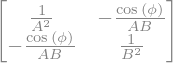

In [3]:
# Definimos la matriz y la imprimimos
M = Matrix([[1/A**2, -cos(phi)/(A*B)], [-cos(phi)/(A*B), 1/B**2]])
M

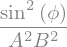

In [4]:
# Calculamos su determinante y lo simplificamos
simplify(det(M))

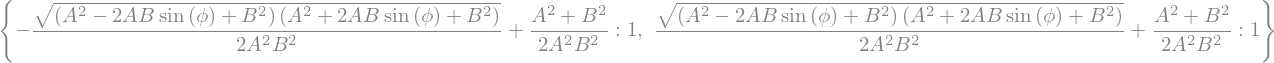

In [5]:
# Calculemos los autovalores, el número luego de ":" es la multiplicidad de cada autovalor
M.eigenvals()

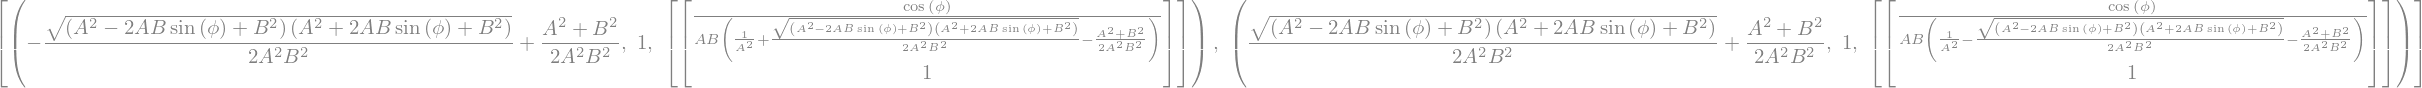

In [6]:
# Y los autovectores; el primer número en la lista es el autovalor, luego la multiplicidad, y finalmente el autovector
M.eigenvects()

## Trayectoria del vector campo eléctrico
Usemos NumPy y Matplotlib para graficar la tryectoria del vector campo eléctrico en el plano (x,y), asumiendo que tenemos una onda que se propaga en la dirección z. Prueben variar la amplitud de la componente Ey (B), y la diferencia de fase entre las componentes Ex y Ey (phi) para dibujar diferentes trayectorias (y polarizaciones) en el plano.

In [7]:
# Importamos NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Definimos valores para las componentes del campo eléctrico (prueben cambiar los valores de phi y B)
omega = 2*np.pi # frecuencia
A   = 1.        # amplitud de Ex
B   = A/2       # amplitud de Ey
phi = np.pi/3   # diferencia de fase entre Ex y Ey

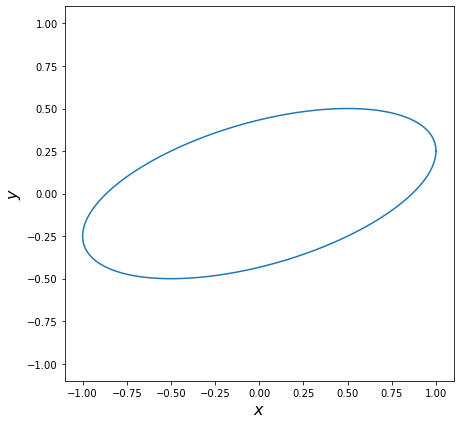

In [9]:
# Graficamos la trayectoria del campo eléctrico en el plano (x,y)
t = np.linspace(0,2*np.pi/omega,1000)

plt.figure(figsize=(6.5,6))
plt.plot(A*np.cos(omega*t),B*np.cos(omega*t-phi))
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$y$',fontsize=16)
plt.xlim(-max(A,B)*1.1,max(A,B)*1.1)
plt.ylim(-max(A,B)*1.1,max(A,B)*1.1)
plt.tight_layout()
plt.show()